In [39]:
import pandas as pd
import numpy as np
from tensorflow import keras
import tensorflow as tf

In [40]:
df = pd.read_csv("telco_churn.csv")

**Data preprocessing**

In [41]:
df.drop(['customerID'],inplace =True,axis = 1)

In [42]:
df['gender'].replace({'Female' : 0,'Male':1},inplace = True)

C:\Users\Dell\AppData\Local\Temp\ipykernel_15464\1087730225.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['gender'].replace({'Female' : 0,'Male':1},inplace = True)
C:\Users\Dell\AppData\Local\Temp\ipykernel_15464\1087730225.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['gender'].re

In [43]:
columns = ['Partner','Dependents','PhoneService','PaperlessBilling','Churn']

In [44]:
for column in columns:
  df[column].replace({'Yes':1,'No':0},inplace = True)#converting all the objects to integers

C:\Users\Dell\AppData\Local\Temp\ipykernel_15464\2208306554.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].replace({'Yes':1,'No':0},inplace = True)#converting all the objects to integers
C:\Users\Dell\AppData\Local\Temp\ipykernel_15464\2208306554.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcast

In [45]:
columns1 = ['OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies']

In [46]:
for column in columns1:
  df[column].replace({'No internet service': 'No'},inplace  = True)  #replacing no internet service to No

C:\Users\Dell\AppData\Local\Temp\ipykernel_15464\2092907459.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].replace({'No internet service': 'No'},inplace  = True)  #replacing no internet service to No


In [47]:
df['MultipleLines'].replace({'No phone service' : 'No'},inplace = True)

C:\Users\Dell\AppData\Local\Temp\ipykernel_15464\3905847837.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['MultipleLines'].replace({'No phone service' : 'No'},inplace = True)


In [48]:
columns2 = ['OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies', 'MultipleLines']
for column in columns2:
  df[column].replace({'Yes':1,'No':0},inplace = True) #SIMILARLY

C:\Users\Dell\AppData\Local\Temp\ipykernel_15464\3921269090.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[column].replace({'Yes':1,'No':0},inplace = True) #SIMILARLY


In [49]:
df.drop(['PaymentMethod'],axis = 1,inplace = True)

In [50]:
df = pd.concat([df,pd.get_dummies(df['Contract'])],axis =1 )

In [51]:
df.drop(['Contract'],axis = 1,inplace = True)

In [52]:
df = pd.concat([df,pd.get_dummies(df['InternetService'])],axis =1 )

In [53]:
df.drop(['InternetService'],axis = 1,inplace = True)

In [54]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,Month-to-month,One year,Two year,DSL,Fiber optic,No
0,0,0,1,0,1,0,0,0,1,0,...,1,29.85,29.85,0,True,False,False,True,False,False
1,1,0,0,0,34,1,0,1,0,1,...,0,56.95,1889.5,0,False,True,False,True,False,False
2,1,0,0,0,2,1,0,1,1,0,...,1,53.85,108.15,1,True,False,False,True,False,False
3,1,0,0,0,45,0,0,1,0,1,...,0,42.30,1840.75,0,False,True,False,True,False,False
4,0,0,0,0,2,1,0,0,0,0,...,1,70.70,151.65,1,True,False,False,False,True,False


In [55]:
df.dtypes

gender                int64
SeniorCitizen         int64
Partner               int64
Dependents            int64
tenure                int64
PhoneService          int64
MultipleLines         int64
OnlineSecurity        int64
OnlineBackup          int64
DeviceProtection      int64
TechSupport           int64
StreamingTV           int64
StreamingMovies       int64
PaperlessBilling      int64
MonthlyCharges      float64
TotalCharges         object
Churn                 int64
Month-to-month         bool
One year               bool
Two year               bool
DSL                    bool
Fiber optic            bool
No                     bool
dtype: object

In [56]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')#converting the object total charges to integer
df['TotalCharges'] = df['TotalCharges'].fillna(0)
df['TotalCharges'] = df['TotalCharges'].astype(float).round().astype(int)

In [57]:
df['MonthlyCharges'] = df['MonthlyCharges'].astype(int) #converting the float Montly charges to integer

In [58]:
from sklearn.model_selection import train_test_split as tst

In [59]:
X = df.drop(['Churn'], axis=1).astype(float)  # Convert all columns to float

In [60]:
X_train,X_test,y_train,y_test = tst(X,df['Churn'], test_size = 0.2) #dividing the dataset for training and testing

In [61]:
X_train.shape

(5634, 22)

**Building a Neural Network model**

In [62]:
ann = keras.Sequential([
    keras.layers.Dense(20,input_shape = (22,),activation = 'relu'),
    keras.layers.Dense(15,activation = 'relu'),
    keras.layers.Dense(15,activation = 'sigmoid'),
    keras.layers.Dense(1,activation = 'sigmoid')
])


C:\Users\Dell\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [63]:
ann.compile(
    optimizer = 'adam',
    loss = 'binary_crossentropy',
    metrics = ['accuracy']
)

In [64]:
import matplotlib.pyplot as plt

Epoch 1/10
177/177 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.5952 - loss: 0.6558
Epoch 2/10
177/177 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7621 - loss: 0.5134
Epoch 3/10
177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7645 - loss: 0.5125
Epoch 4/10
177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7659 - loss: 0.5078
Epoch 5/10
177/177 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7755 - loss: 0.5067
Epoch 6/10
177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7762 - loss: 0.4949
Epoch 7/10
177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7723 - loss: 0.5116
Epoch 8/10
177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7796 - loss: 0.5027
Epoch 9/10
177/177 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7656 - loss: 0.4990
Epoch 10/10
177/177 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7828 - loss: 0.4971


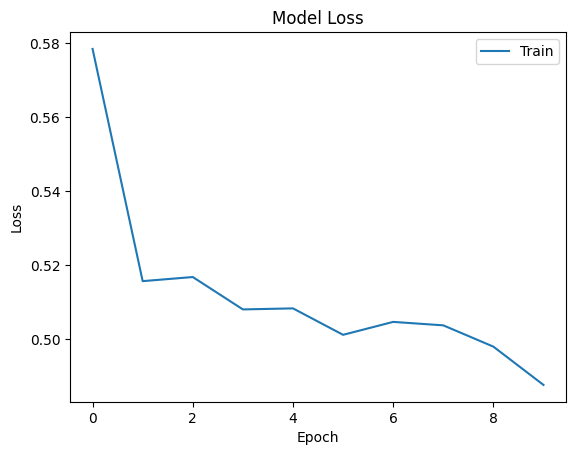

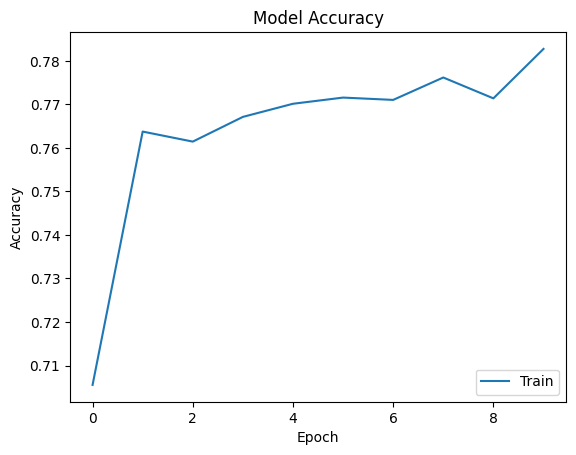

In [65]:
solution = ann.fit(X_train,y_train,epochs = 10)
# Plot loss
plt.plot(solution.history['loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

# Plot accuracy
plt.plot(solution.history['accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

Finally we found the accuracy and the loss use different optimizer and loss factors and activation functions to get different values of accuracy.

In [66]:
ann.predict(X_test)

45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step


array([[0.12933868],
       [0.12933868],
       [0.12933868],
       ...,
       [0.12703094],
       [0.12842438],
       [0.12932995]], dtype=float32)

In [38]:
from sklearn.metrics import classification_report
y_pred = ann.predict(X_test).astype(int)
print(classification_report(y_test,y_pred))

45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
              precision    recall  f1-score   support

           0       0.74      1.00      0.85      1045
           1       0.00      0.00      0.00       364

    accuracy                           0.74      1409
   macro avg       0.37      0.50      0.43      1409
weighted avg       0.55      0.74      0.63      1409



C:\Users\Dell\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Dell\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Dell\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is",